# Zombies Apocalypse

- Data Source: [Kaggle](https://www.kaggle.com/datasets/kingabzpro/zombies-apocalypse)
- Tasks: compare humans and zombies to identify differences in supplies
- Language: [python](https://www.python.org/)

## Context

News reports suggest that the impossible has become possible…zombies have appeared on the streets of the US! What should we do? The Centers for Disease Control and Prevention (CDC) zombie preparedness website recommends storing water, food, medication, tools, sanitation items, clothing, essential documents, and first aid supplies. Thankfully, we are CDC analysts and are prepared, but it may be too late for others!

## Content

Our team decides to identify supplies that protect people and coordinate supply distribution. A few brave data collectors volunteer to check on 200 randomly selected adults who were alive before the zombies. We have recent data for the 200 on age and sex, how many are in their household, and their rural, suburban, or urban location. Our heroic volunteers visit each home and record zombie status and preparedness. Now it's our job to figure out which supplies are associated with safety!

## File

Because every moment counts when dealing with life and (un)death, we want to get this right! The first task is to compare humans and zombies to identify differences in supplies. We review the data and find the following:

- zombieid: unique identifier
- zombie: human or zombie
- age: age in years
- sex: male or female
- rurality: rural, suburban, or urban
- household: number of people living in household
- water: gallons of clean water available
- food: food or no food
- medication: medication or no medication
- tools: tools or no tools
- firstaid: first aid or no first aid
- sanitation: sanitation or no sanitation
- clothing: clothing or no clothing
- documents: documents or no documents

## Acknowledgements

DataCamp


In [4]:
import numpy as np

In [2]:
np.random.seed(42)
" → ".join(np.random.permutation("Simon Mike Max Chris Felix Joel Robin".split()))

'Simon → Mike → Joel → Max → Felix → Chris → Robin'

## 1. Data loading

In [42]:
import pandas as pd
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'urllib2'

In [5]:
data = pd.read_csv("zombies.csv")

NameError: name 'urllib2' is not defined

,zombieid,zombie,age,sex,rurality,household,water,food,medication,tools,firstaid,sanitation,clothing,documents
0,1,Human,18,Female,Rural,1,0,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
1,2,Human,18,Male,Rural,3,24,Food,Medication,tools,First aid supplies,Sanitation,Clothing,NaN
2,3,Human,18,Male,Rural,4,16,Food,Medication,No tools,First aid supplies,Sanitation,Clothing,NaN
3,4,Human,19,Male,Rural,1,0,Food,Medication,tools,No first aid supplies,Sanitation,Clothing,NaN
4,5,Human,19,Male,Urban,1,0,Food,Medication,No tools,First aid supplies,Sanitation,NaN,NaN


In [15]:
data_rural = data[data['rurality'] == 'Rural']
data_urban = data[data['rurality'] == 'Urban']

total_rural = data_rural.shape[0]
total_urban = data_urban.shape[0]

print(f"rural {total_rural} urban {total_urban}")


# Don't say the "Z-word"!
urban_infected = data_urban[data_urban['zombie'] == "Zombie"]
urban_humans = data_urban[data_urban["zombie"] == "Human"]

rural_infected = data_rural[data_rural["zombie"] == "Zombie"]
rural_humans = data_rural[data_rural["zombie"] == "Human"]


print(f" urban infected {urban_infected.shape[0]} urban humans {urban_humans.shape[0]} rural infected {rural_infected.shape[0]} rural humans {rural_humans.shape[0]}")


rural 98 urban 54
 urban infected 38 urban humans 16 rural infected 18 rural humans 80


<BarContainer object of 4 artists>

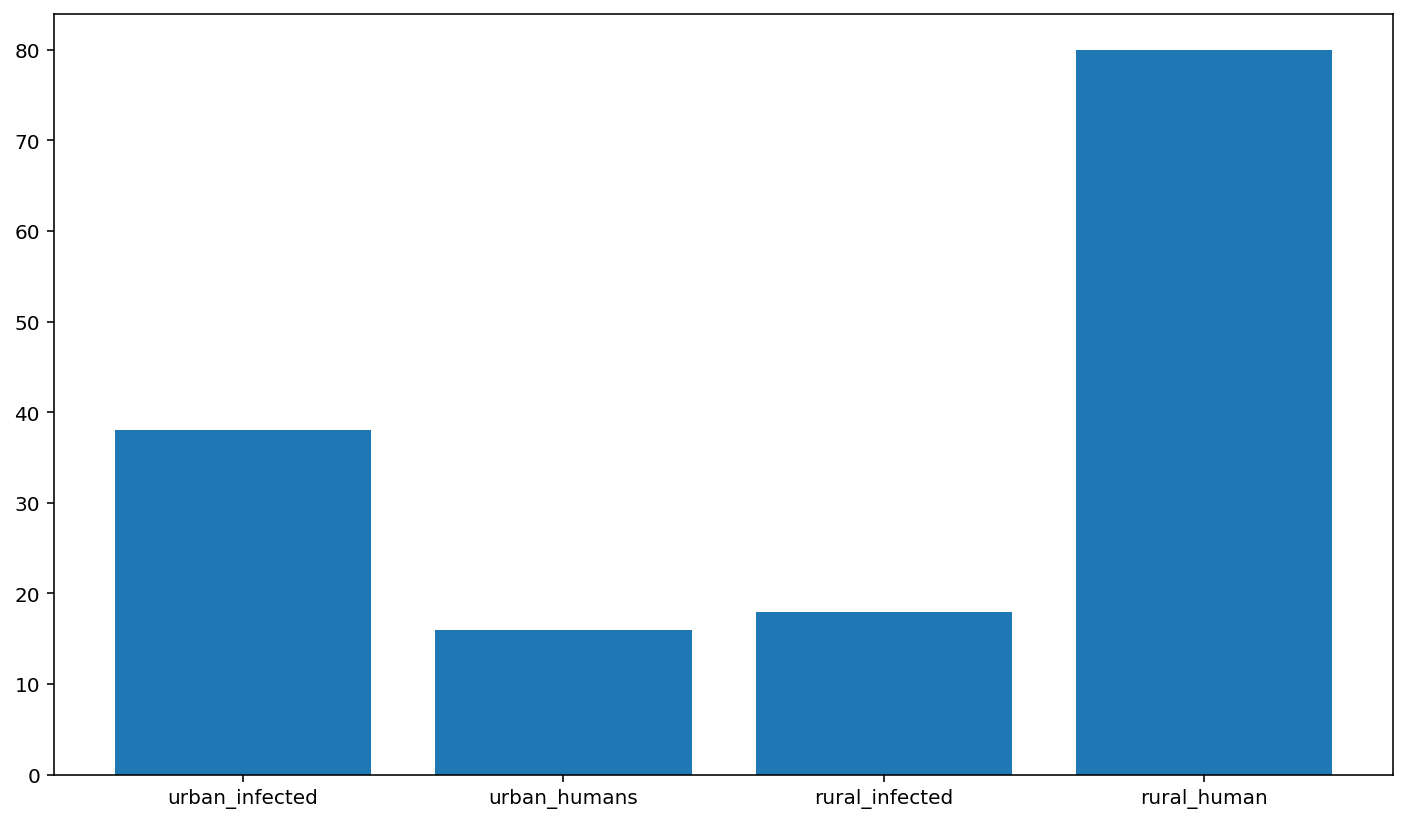

In [16]:
urban_vs_rural = [urban_infected.shape[0], urban_humans.shape[0], rural_infected.shape[0], rural_humans.shape[0]]
cats = ['urban_infected', 'urban_humans', 'rural_infected', 'rural_human']

plt.bar(cats, urban_vs_rural)

In [28]:
data["clothing"] = data["clothing"].fillna("No Clothing")

In [32]:
clothed = data[data['clothing'] == 'Clothing']
clothless = data[data['clothing'] == 'No Clothing']

total_clothed = clothed.shape[0]
total_clothless = clothless.shape[0]




# Don't say the "Z-word"!
clothed_infected = clothed[clothed['zombie'] == "Zombie"]
clothed_humans = clothed[clothed["zombie"] == "Human"]

clothless_infected = clothless[clothless["zombie"] == "Zombie"]
clothless_humans = clothless[clothless["zombie"] == "Human"]


0.6115702479338843
0.6582278481012658
0.3884297520661157
0.34177215189873417


<BarContainer object of 4 artists>

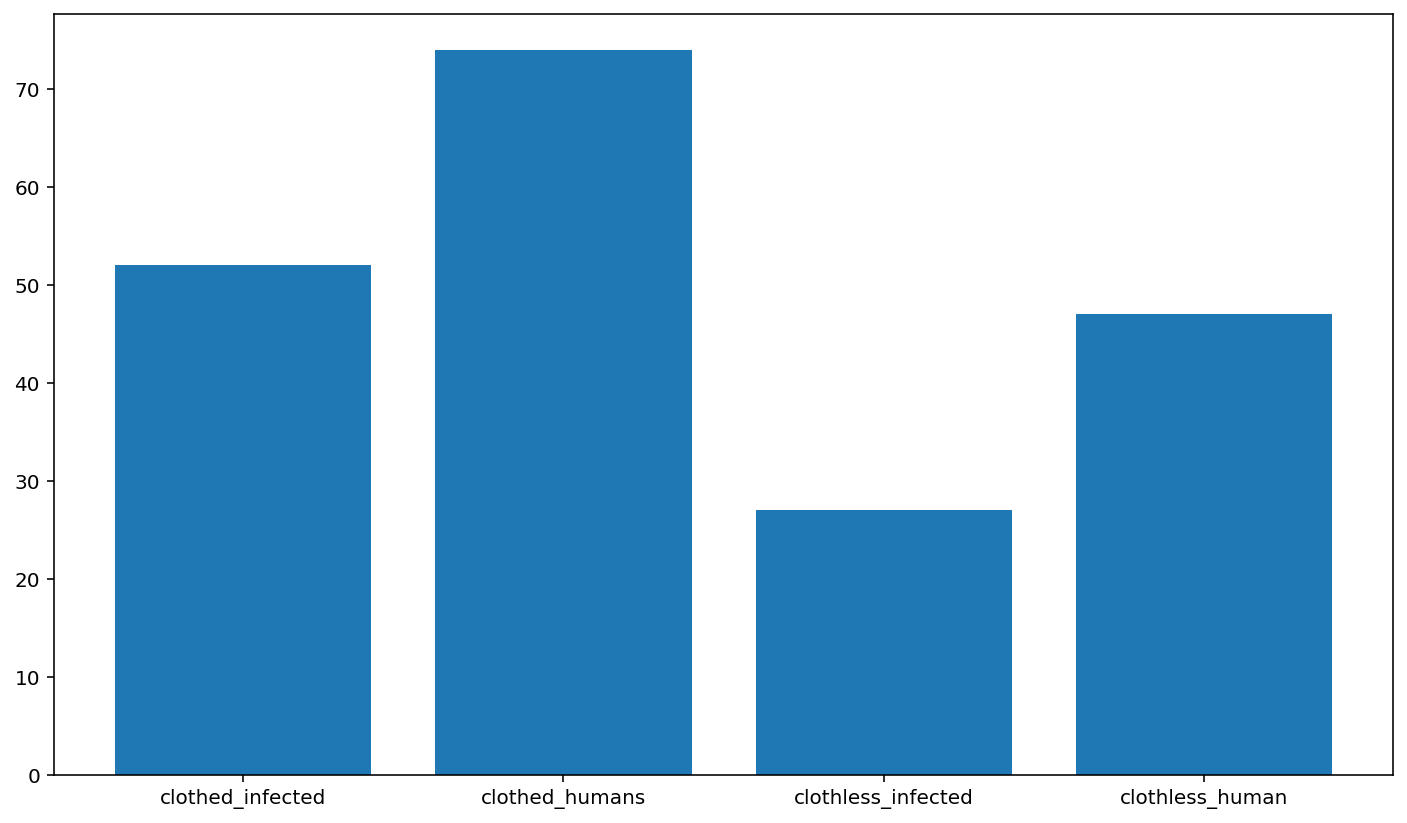

In [38]:
clothed_vs_clothless = [clothed_infected.shape[0], clothed_humans.shape[0], clothless_infected.shape[0], clothless_humans.shape[0]]
cats = ['clothed_infected', 'clothed_humans', 'clothless_infected', 'clothless_human']

total_humans = clothed_humans.shape[0] + clothless_humans.shape[0]
total_infected = clothed_infected.shape[0] + clothless_infected.shape[0]
print(clothed_humans.shape[0]/total_humans)
print(clothed_infected.shape[0]/total_infected)

print(clothless_humans.shape[0]/total_humans)
print(clothless_infected.shape[0]/total_infected)
plt.bar(cats, clothed_vs_clothless)


<Axes: xlabel='zombie', ylabel='age'>

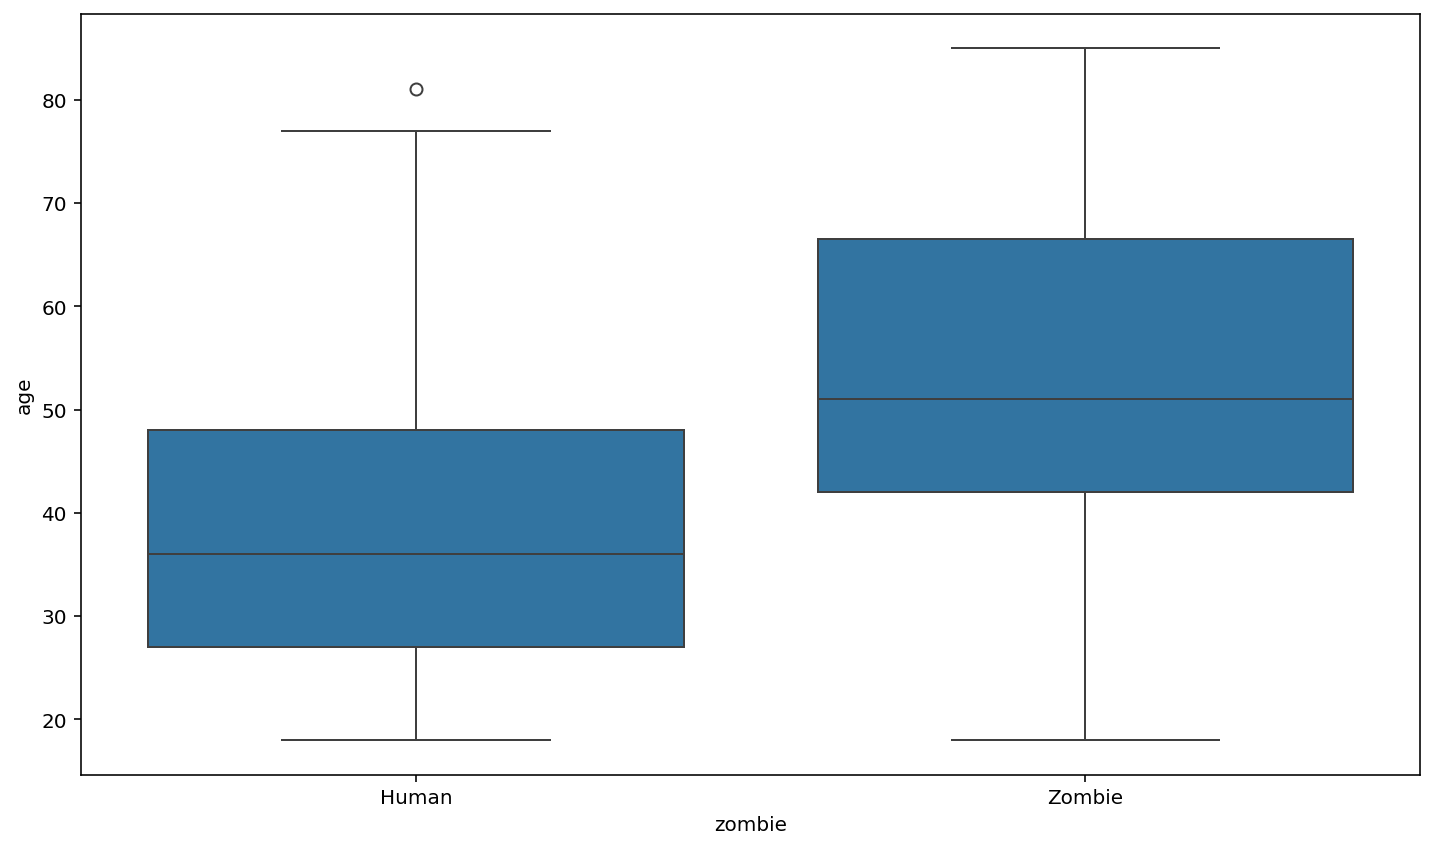

In [39]:
import seaborn as sns

sns.boxplot(x='zombie', y='age', data=data)